# Boston House Prices Prediction
- Kaggle 連結: https://www.kaggle.com/vikrishnan/boston-house-prices
    - 供參考用，本次作業使用 scikit-learn 內裝的 dataset

In [1]:

import time

EXECUTION_START_TIME = time.time() # 計算執行時間

In [2]:

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
import pandas as pd

In [3]:
# 使用 scikit-learn 的資料

dataset = load_boston()
print(type(dataset))

<class 'sklearn.utils.Bunch'>


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
# 觀察資料的 key 值有哪些

dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
print(len(dataset['data']))

506


In [6]:
df = pd.DataFrame(
    dataset.data, columns = dataset.feature_names
)

print(df)


        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [7]:
print(df.columns.values)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
print("Number of features: ", len(dataset.feature_names))

Number of features:  13


In [9]:
df['MEDV'] = dataset.target 

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
# Please use some functions of Pandas here.

print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

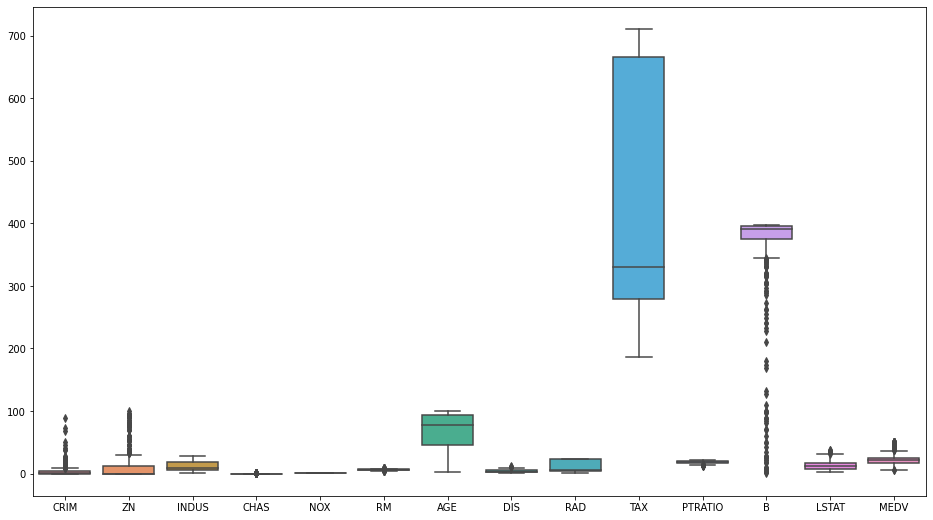

In [13]:
plt.figure(figsize=(16, 9))
sns.boxplot(data=df)

有些數據有很多極端值，可以考慮去除或做其他處理，不過先調整後面參數後，不需要用到這個就可以達成目標，因此沒做處理

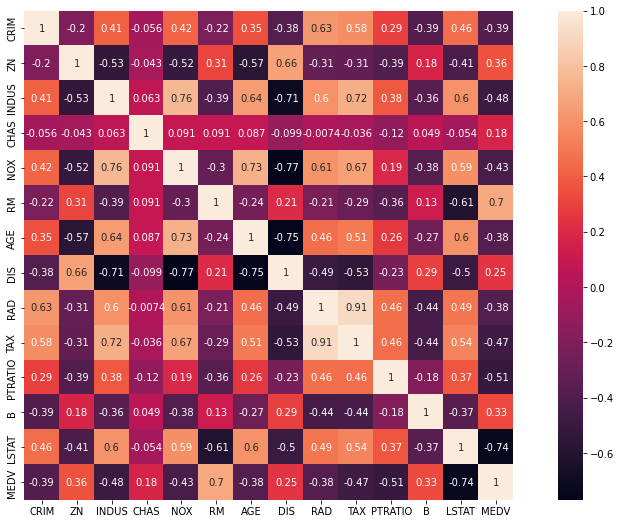

In [14]:
plt.figure(figsize=(16, 9))
sns.heatmap(df.corr(),square=True, annot=True)


0~1為正相關，越接近1的相關度越大
-1~0為負相關，越接近-1的負相關越多
RM:顯著正相關
LSTAT:顯著負相關

In [15]:
X = pd.DataFrame(np.c_[df.RM,df.LSTAT], columns = ['RM','LSTAT'])

先挑出兩個試看看RM:顯著正相關 LSTAT:顯著負相關

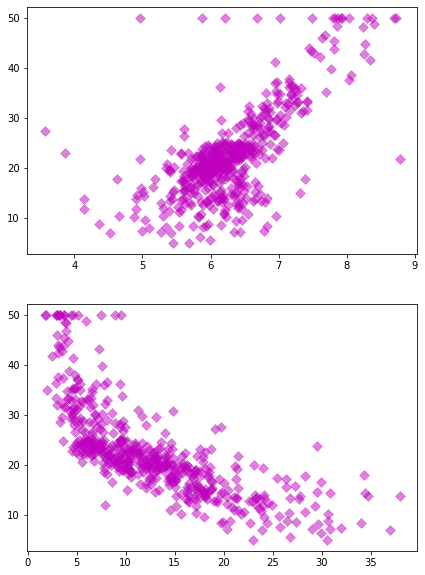

In [16]:

num=2
select_two=['RM','LSTAT']
fig = plt.figure(figsize=(7,num*5))

for i in range(0,num):
  ax=fig.add_subplot(num, 1, i+1)
  x=df[select_two[i]]
  y=df['MEDV']
  
  ax.scatter(x, y, alpha=0.5, linewidths=0.5 ,s = 50,  c="m",marker = 'D')


將RM，LSTAT這兩個特徵分別拿去跟房價去做畫圖，可以看得出他們兩個特徵分別集中的地方

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,df['MEDV'],test_size= 0.2,random_state=9527)

print(X_train.shape) #(404, 2)
print(X_test.shape) #(102, 2)
print(Y_train.shape) #(404, )
print(Y_test.shape) #(102, )

Y_true=Y_test

(404, 2)
(102, 2)
(404,)
(102,)


In [18]:
# Modeling
from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print(r2_score(Y_true,Y_pred))
print(mean_squared_error(Y_true,Y_pred))


0.6779520561955262
31.220080479594582


訓練結果如上: r2_score=67.8，mean_squared_error=31.2，下圖是將結果作圖，其中 X軸 為 Y_pred、Y軸為 Y_true

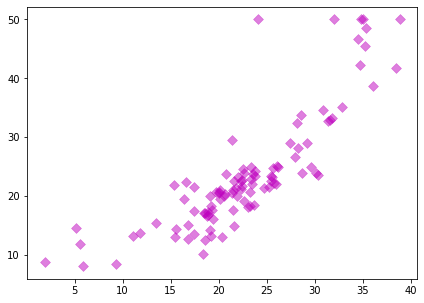

In [19]:
# plotting the y_test vs y_pred

plt.figure(figsize=(7,5))
x=Y_pred
y=Y_true
  
plt.scatter(x, y, alpha=0.5, linewidths=0.5 ,s = 50,  c="m",marker = 'D')

# plt.show

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
# Modeling

model=RandomForestRegressor()

model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print(r2_score(Y_true,Y_pred))
print(mean_squared_error(Y_true,Y_pred))


0.7592768665221585
23.336263264705867


訓練結果如上: r2_score=75.9，mean_squared_error=23.3，下圖是將結果作圖，其中 X軸 為 Y_pred、Y軸為 Y_true

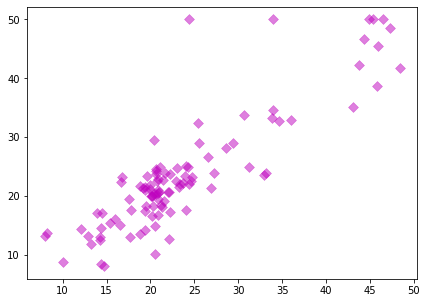

In [22]:
# plotting the y_test vs y_pred

plt.figure(figsize=(7,5))
x=Y_pred
y=Y_true
  
plt.scatter(x, y, alpha=0.5, linewidths=0.5 ,s = 50,  c="m",marker = 'D')


In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
n_estimators=[100,250,500]
max_depth=[2,4,6]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
grid=GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid,cv=5,error_score='raise')
grid_result=grid.fit(X_train,Y_train)
print(f"The best estimator across ALL searched params:",grid_result.best_estimator_)
print(f"The best score : {grid_result.best_score_}，The best parameters：{grid_result.best_params_}")


model=grid_result.best_estimator_

model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

print("model name:", model)
print(r2_score(Y_true,Y_pred))
print(mean_squared_error(Y_true,Y_pred))


The best estimator across ALL searched params: RandomForestRegressor(max_depth=4, n_estimators=250)
The best score : 0.7251101017305351，The best parameters：{'max_depth': 4, 'n_estimators': 250}
model name: RandomForestRegressor(max_depth=4, n_estimators=250)
0.7733959211074903
21.967529109031602


The best estimator across ALL searched params: SVR(degree=1)
The best score : 0.6013776311592316，The best parameters：{'degree': 1}
model name: SVR(degree=1)
0.6031201352482043
38.47446182051837


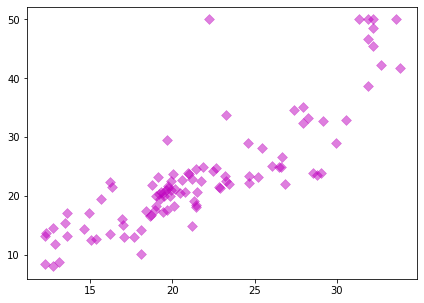

In [25]:
from sklearn.svm import SVR

model=SVR()

degree=[1,3,5,7,9]
param_grid = dict(degree=degree)
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=5,error_score='raise')
grid_result=grid.fit(X_train,Y_train)
print(f"The best estimator across ALL searched params:",grid_result.best_estimator_)
print(f"The best score : {grid_result.best_score_}，The best parameters：{grid_result.best_params_}")

model=grid_result.best_estimator_

model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

print("model name:", model)
print(r2_score(Y_true,Y_pred))
print(mean_squared_error(Y_true,Y_pred))

plt.figure(figsize=(7,5))

x=Y_pred
y=Y_true
  
plt.scatter(x, y, alpha=0.5, linewidths=0.5 ,s = 50,  c="m",marker = 'D')


The best estimator across ALL searched params: GradientBoostingRegressor()
The best score : 0.7071325656584978，The best parameters：{'learning_rate': 0.1, 'n_estimators': 100}
model name: GradientBoostingRegressor()
0.7788192881902105
21.441775226573316


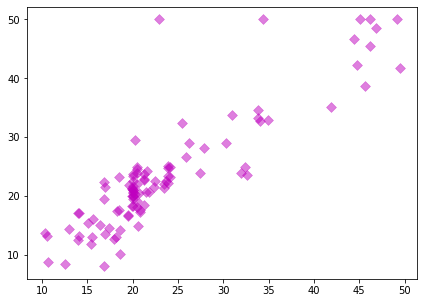

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

model=GradientBoostingRegressor()

learning_rate=[0.1,0.2,0.3]
n_estimators=[100,300,500]
param_grid = dict(n_estimators=n_estimators,learning_rate=learning_rate)
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=5,error_score='raise')
grid_result=grid.fit(X_train,Y_train)
print(f"The best estimator across ALL searched params:",grid_result.best_estimator_)
print(f"The best score : {grid_result.best_score_}，The best parameters：{grid_result.best_params_}")

model=grid_result.best_estimator_

model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

print("model name:", model)
print(r2_score(Y_true,Y_pred))
print(mean_squared_error(Y_true,Y_pred))

plt.figure(figsize=(7,5))

x=Y_pred
y=Y_true
  
plt.scatter(x, y, alpha=0.5, linewidths=0.5 ,s = 50,  c="m",marker = 'D')


The best estimator across ALL searched params: XGBRegressor(max_depth=2, objective='reg:squarederror')
The best score : 0.7208406002059269，The best parameters：{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
model name: XGBRegressor(max_depth=2, objective='reg:squarederror')
0.783378466682894
20.99979780612802


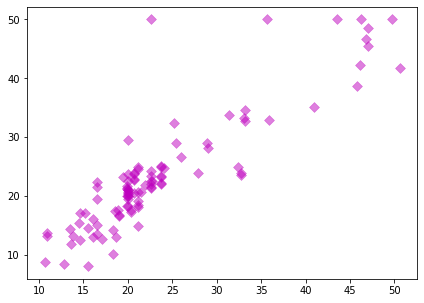

In [27]:
from xgboost import XGBRegressor

model=XGBRegressor(objective ='reg:squarederror')

learning_rate=[0.1,0.15,0.2]
n_estimators=[100,300,500]
max_depth=[2,4,6]
param_grid = dict(n_estimators=n_estimators,learning_rate=learning_rate,max_depth=max_depth)
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=5,error_score='raise')
grid_result=grid.fit(X_train,Y_train)
print(f"The best estimator across ALL searched params:",grid_result.best_estimator_)
print(f"The best score : {grid_result.best_score_}，The best parameters：{grid_result.best_params_}")

model=grid_result.best_estimator_

model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

print("model name:", model)
print(r2_score(Y_true,Y_pred))
print(mean_squared_error(Y_true,Y_pred))

plt.figure(figsize=(7,5))

x=Y_pred
y=Y_true
  
plt.scatter(x, y, alpha=0.5, linewidths=0.5 ,s = 50,  c="m",marker = 'D')


The best estimator across ALL searched params: ElasticNet(l1_ratio=0.7, max_iter=500)
The best score : 0.5639011296101156，The best parameters：{'l1_ratio': 0.7, 'max_iter': 500}
model name: ElasticNet(l1_ratio=0.7, max_iter=500)
0.5845970774106891
40.27013034609204


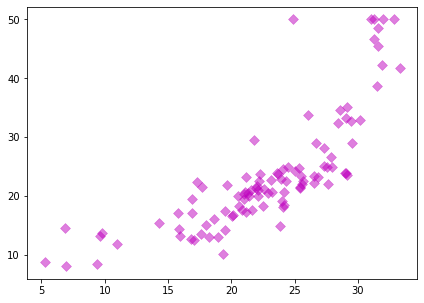

In [28]:
from sklearn.linear_model import ElasticNet

model=ElasticNet()

l1_ratio=[0.3,0.5,0.7]
max_iter=[500,1000]
param_grid = dict(l1_ratio=l1_ratio,max_iter=max_iter)
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=5,error_score='raise')
grid_result=grid.fit(X_train,Y_train)
print(f"The best estimator across ALL searched params:",grid_result.best_estimator_)
print(f"The best score : {grid_result.best_score_}，The best parameters：{grid_result.best_params_}")

model=grid_result.best_estimator_

model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

print("model name:", model)
print(r2_score(Y_true,Y_pred))
print(mean_squared_error(Y_true,Y_pred))

plt.figure(figsize=(7,5))

x=Y_pred
y=Y_true
  
plt.scatter(x, y, alpha=0.5, linewidths=0.5 ,s = 50,  c="m",marker = 'D')


The best estimator across ALL searched params: BayesianRidge(n_iter=100)
The best score : 0.596380052547999，The best parameters：{'n_iter': 100}
model name: BayesianRidge(n_iter=100)
0.6763035603843026
31.379889516996553


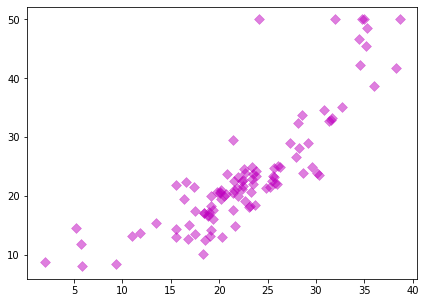

In [29]:
from sklearn.linear_model import BayesianRidge

model=BayesianRidge()

n_iter=[100,300,500]
param_grid = dict(n_iter=n_iter)
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=5,error_score='raise')
grid_result=grid.fit(X_train,Y_train)
print(f"The best estimator across ALL searched params:",grid_result.best_estimator_)
print(f"The best score : {grid_result.best_score_}，The best parameters：{grid_result.best_params_}")

model=grid_result.best_estimator_

model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

print("model name:", model)
print(r2_score(Y_true,Y_pred))
print(mean_squared_error(Y_true,Y_pred))

plt.figure(figsize=(7,5))

x=Y_pred
y=Y_true
  
plt.scatter(x, y, alpha=0.5, linewidths=0.5 ,s = 50,  c="m",marker = 'D')


上述用了很多個不同模型去試看看，也分別調整參數和畫圖，跟前面的去比較訓練結果: XGBRegressor 最好

In [30]:
all=['CRIM', 'ZN' ,'INDUS', 'CHAS' ,'NOX', 'RM' ,'AGE', 'DIS', 'RAD' ,'TAX', 'PTRATIO' , 'B', 'LSTAT']
all_df=[df.CRIM, df.ZN ,df.INDUS, df.CHAS ,df.NOX, df.RM ,df.AGE, df.DIS, df.RAD ,df.TAX, df.PTRATIO , df.B , df.LSTAT]
model_list=[XGBRegressor(objective ='reg:squarederror'),GradientBoostingRegressor()]

max = 0
min = 10000

score=[-1,-1,-1]
mean_eror=[-1,-1,-1]

for i in range(0,13) :
  for j in range (0,13) :
    for h in range (0,13) :
      # for w in range (0,13) :
        # if(i!=j and i!=h and i!=w and j!=h and j!=w and h!=w and i!=5 and j!=5 and i!=12 and j!=12 and h!=5 and h!=12 and w!=5 and w!=12):
      if(i!=j and i!=h and j!=h and i!=5 and j!=5 and i!=12 and j!=12 and h!=5 and h!=12):
          all=['CRIM', 'ZN' ,'INDUS', 'CHAS' ,'NOX', 'RM' ,'AGE', 'DIS', 'RAD' ,'TAX', 'PTRATIO' , 'B', 'LSTAT']
          all_df=[df.CRIM, df.ZN ,df.INDUS, df.CHAS ,df.NOX, df.RM ,df.AGE, df.DIS, df.RAD ,df.TAX, df.PTRATIO , df.B , df.LSTAT]
          select=[all[5],all[12],all[i],all[j],all[h]]
          X = pd.DataFrame(np.c_[all_df[5],all_df[12],all_df[i],all_df[j],all_df[h]], columns = select)
          X_train, X_test, Y_train, Y_test = train_test_split(X,df['MEDV'],test_size= 0.2,random_state=9527)

        # for t in range(0,1):
          
          model=model_list[0]
          
          model.fit(X_train,Y_train)

          Y_pred = model.predict(X_test)

          if (r2_score(Y_true,Y_pred)>max):
            max=r2_score(Y_true,Y_pred)
            # which_model=t
            score[0]=i
            score[1]=j
            score[2]=h
            # score[3]=w
          if(min>mean_squared_error(Y_true,Y_pred)):
            min=mean_squared_error(Y_true,Y_pred)
            # which_modell=t
            mean_eror[0]=i
            mean_eror[1]=j
            mean_eror[2]=h
            # mean_eror[3]=w
          # print(r2_score(Y_true,Y_pred))
          # print(mean_squared_error(Y_true,Y_pred))
          # print("\n")

print(max)
print(min)
print(score)
print(mean_eror)



0.8915680630314953
10.511645436153895
[9, 0, 7]
[9, 0, 7]


上面這個是找要選擇哪幾個特徵的方法，後面的block會再做參數的調整

In [31]:
from xgboost import XGBRegressor

minn=10000
ik=0

all=['CRIM', 'ZN' ,'INDUS', 'CHAS' ,'NOX', 'RM' ,'AGE', 'DIS', 'RAD' ,'TAX', 'PTRATIO' , 'B', 'LSTAT']
all_df=[df.CRIM, df.ZN ,df.INDUS, df.CHAS ,df.NOX, df.RM ,df.AGE, df.DIS, df.RAD ,df.TAX, df.PTRATIO , df.B , df.LSTAT]
select=[all[5],all[0],all[12],all[9],all[7]]
X = pd.DataFrame(np.c_[all_df[5],all_df[0],all_df[12],all_df[9],all_df[7]], columns = select)
X_train, X_test, Y_train, Y_test = train_test_split(X,df['MEDV'],test_size= 0.2,random_state=9527)

for i in range(1,2):    
  model=XGBRegressor(objective ='reg:squarederror',n_estimators=50*5,max_depth=6,subsample=9/10,learning_rate=3*0.05,random_state=0)

  model.fit(X_train,Y_train)

  Y_pred = model.predict(X_test)
  if(minn>mean_squared_error(Y_true,Y_pred)):
    minn=mean_squared_error(Y_true,Y_pred)
    ik=i

  print(r2_score(Y_true,Y_pred))
  print(mean_squared_error(Y_true,Y_pred))


0.9105880520815386
8.66780323723001


說明如何做到:

先固定其中兩個強特徵: RM,LSTAT 

然後再用迴圈去跑加入什麼特徵會讓模型跑出最好的結果 -> 再加入三個特徵CRIM,DIS,TAX

接下來去更改他的參數n_estimators,max_depth,subsample,learning_rate就達到了

方法:先改n_estimators=i*50然後用迴圈去找i=range(1,30)找出最好的(i=5)之後，固定n_estimators=250，再來設max_depth=i同樣用迴圈去找i=range(1,9)去找出最好的，接下來以此類推去找剩下的參數

In [32]:
# 請勿更動此區塊程式碼

EXECUTION_END_TIME = time.time() # 計算執行時間
print('total execution time: {}'.format(EXECUTION_END_TIME - EXECUTION_START_TIME))

total execution time: 103.4252667427063
